In [5]:
import pandas as pd
import os
import numpy as np
from ecgdetectors import Detectors
from time import time as time
import seaborn as sns
from hrvanalysis.hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_geometrical_features, get_frequency_domain_features, get_csi_cvi_features, get_poincare_plot_features, get_sampen
from time import time as time
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
fs = 250

#final fetures folder path
finalfeats_path = "FinalFeats/"

#R-peak files path

vfdb_path = "../vf2/finaldfs/final5sec.csv"
afdb_path = "../af/hugedfrpeak5sec.csv"
challenge_path = "../af2/finaldfs/2017final_normal_rpeak_L5_S1.csv"

In [16]:
afdb = pd.read_csv(afdb_path,index_col=[0])
afdb

,af,0,1,2,3,4,5,6,7,8,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787506,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787507,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787508,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787509,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
afdb.reset_index(drop=True, inplace=True)

In [18]:
afdb

,af,0,1,2,3,4,5,6,7,8,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787149,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787150,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787151,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787152,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
vfdb = pd.read_csv(vfdb_path,index_col=[0])
vfdb

,vf,0,1,2,3,4,5,6,7,8,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
challenge = pd.read_csv(challenge_path)
challenge

,af,0,1,2,3,4,5,6,7,8,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Extraction Module

In [20]:
def featureExtraction(df, fs, label):
    df1 = df[label].copy()
    df.drop(columns = [label], inplace = True)
    final = list()
    for i in range(len(df)):
        peaks = []
        peaks = df.loc[i][df.loc[i] == 1].index.values
        peaks = [int(x) for x in peaks]
        peaks = [peaks[x+1] - peaks[x] for x in range(len(peaks) - 1)]
        if (len(peaks) == 0 or len(peaks) == 1):
            continue
        time_domain_features = get_time_domain_features(250,peaks)
#         geometrical_features = get_geometrical_features(peaks)
        features = [time_domain_features]
        new = {}
        for x in features:
            for y in x:
                new[y] = x[y]
        new
        vf = df1.loc[i]
        #single_window_df = pd.DataFrame(new.items(), columns = list(new.keys()))
        single_window_df = pd.DataFrame(list(new.items()))
        single_window_df = single_window_df.transpose()
        columns = single_window_df.iloc[0]
        single_window_df = single_window_df[1:]
        single_window_df.columns = columns
#         single_window_df.drop(columns = ['std_hr'], inplace = True)
        single_window_df.insert(0, label, vf)
        final.append(single_window_df)
        del single_window_df
    return pd.concat(final)

## AFDB

In [21]:
afdb_feats = featureExtraction(afdb, fs, 'af')
afdb_feats.reset_index(drop = True, inplace = True)

In [105]:
afdb_feats

,af,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr
0,0,175.166667,45.039612,60.945878,4.0,80.000000,4.0,80.000000,64.143589,0.366186,0.257124,359.732339,431.654676,251.046025,73.521467
1,0,175.166667,44.638175,67.354584,3.0,60.000000,3.0,60.000000,69.092691,0.394440,0.254833,359.180415,416.666667,251.046025,71.633476
2,0,176.500000,46.539231,67.747767,3.0,60.000000,3.0,60.000000,70.047127,0.396868,0.263678,357.667670,416.666667,251.046025,73.663194
3,0,196.400000,44.892093,62.866426,3.0,75.000000,3.0,75.000000,63.227763,0.321934,0.228575,319.713024,405.405405,251.046025,69.708420
4,0,192.000000,40.540104,40.449815,2.0,50.000000,2.0,50.000000,43.974424,0.229033,0.211146,324.803358,405.405405,256.410256,65.298039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769159,1,91.333333,42.371374,63.660775,7.0,63.636364,10.0,90.909091,63.842847,0.699009,0.463920,750.602431,1132.075472,285.714286,235.441064
769160,1,91.538462,43.961376,71.516898,10.0,83.333333,12.0,100.000000,71.523889,0.781353,0.480250,765.437060,1132.075472,285.714286,261.766781
769161,1,84.857143,43.061418,66.222951,10.0,76.923077,12.0,92.307692,66.225140,0.780431,0.507458,821.298411,1132.075472,285.714286,255.114721
769162,1,98.454545,53.359842,70.987393,9.0,90.000000,9.0,90.000000,71.083753,0.721996,0.541974,755.572381,1132.075472,285.714286,301.298392


In [ ]:
afdb_feats2 = afdb_feats.

In [100]:
afdb_feats.af.value_counts()

0    461691
1    307473
Name: af, dtype: int64

In [113]:
df0 = afdb_feats[afdb_feats['af'].eq(0)].sample(15000+3750)
df1 = afdb_feats[afdb_feats['af'].eq(1)].sample(15000+3750)
testdf0 = df0[df0['af'].eq(0)].sample(3750)
testdf1 = df1[df1['af'].eq(1)].sample(3750)
df0.drop(testdf0.index, inplace=True)
df1.drop(testdf1.index, inplace=True)

In [118]:
afdb_train = pd.concat([df0,df1])
afdb_test = pd.concat([testdf0, testdf1])

In [111]:
df0.drop(testdf0.index, inplace=True)
df1.drop(testdf1.index, inplace=True)

In [103]:
train - 200k 0 200k 1
test - 107473 0 107473 1

51.2776

In [ ]:
afd[finaldf1['af'].eq(0)].sample(200000).index

In [104]:
307473-200000

107473

In [25]:
afdb_feats.isnull().any().sum()

0

In [27]:
afdb_feats.to_csv(finalfeats_path+'afdbfeats.csv', index = False)

In [32]:
def plot_corr(df, plotname):
    s = df.select_dtypes(include='object').columns
    df[s] = df[s].astype("float")
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.subplots(figsize=(20,15))
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200))
    plt.savefig(finalfeats_path+plotname)

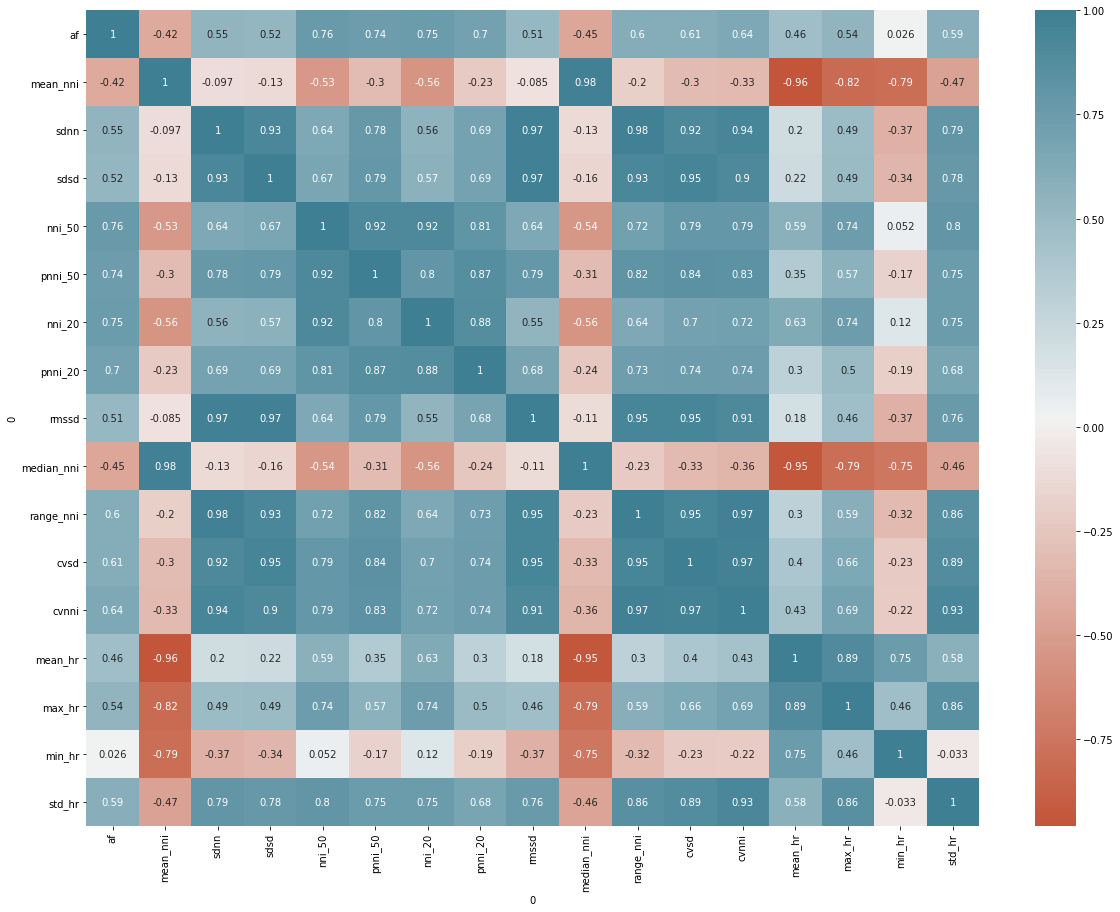

In [33]:
plot_corr(afdb_feats,'afdbHeatmap')

## 2017 Challenge -AF

In [324]:
challenge_feats.shape

(162437, 15)

In [396]:
X = challenge_feats.iloc[:,1:]
y = challenge_feats.iloc[:,:1]

In [34]:
challenge_feats = featureExtraction(challenge, fs, 'af')
challenge_feats.reset_index(drop = True, inplace = True)

In [38]:
challenge_feats.to_csv(finalfeats_path+'2017feats.csv', index = False)

In [121]:
df0 = challenge_feats[challenge_feats['af'].eq(0)].sample(15000+3750)
df1 = challenge_feats[challenge_feats['af'].eq(1)].sample(15000+3750)
testdf0 = df0[df0['af'].eq(0)].sample(3750)
testdf1 = df1[df1['af'].eq(1)].sample(3750)
df0.drop(testdf0.index, inplace=True)
df1.drop(testdf1.index, inplace=True)

In [122]:
challenge_train = pd.concat([df0,df1])
challenge_test = pd.concat([testdf0, testdf1])

In [123]:
challenge_train.af.value_counts()

0    15000
1    15000
Name: af, dtype: int64

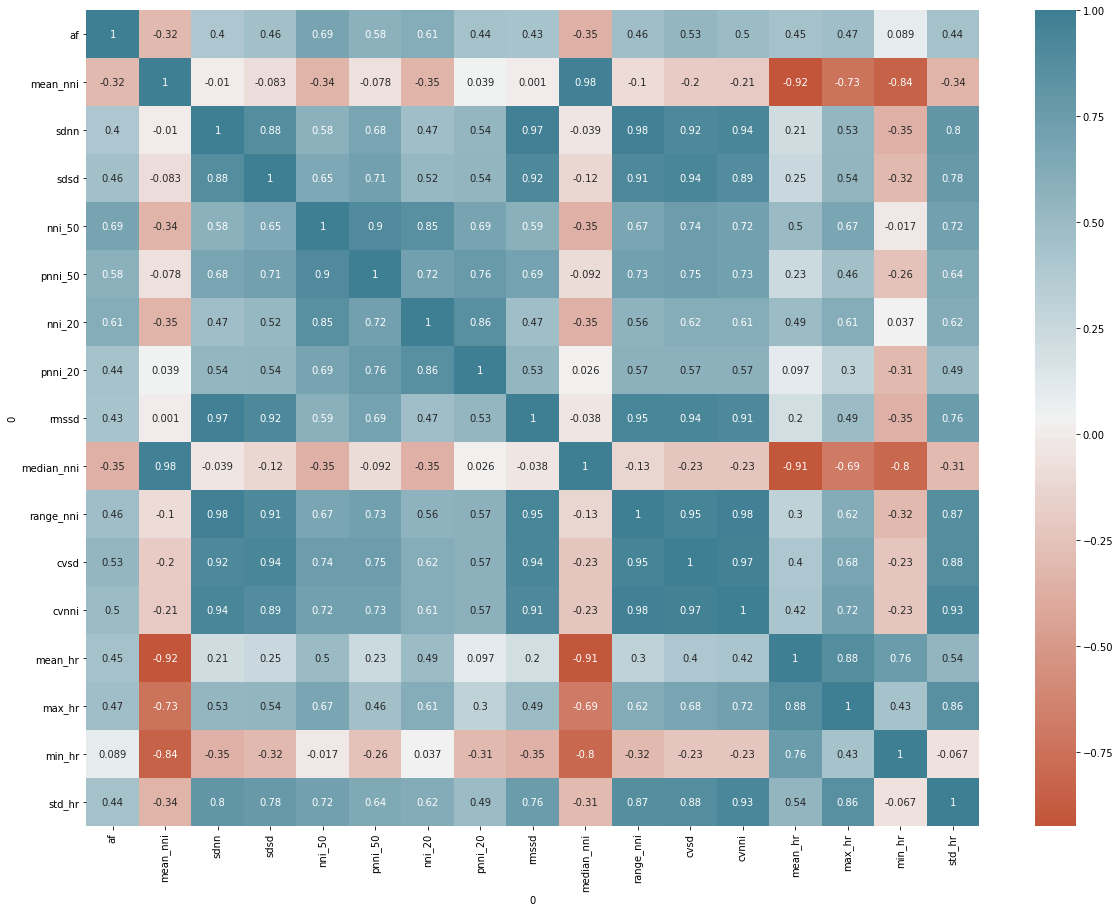

In [39]:
plot_corr(challenge_feats,'2017Heatmap')

In [ ]:
X = 

In [397]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
f_score, f_p_value = f_classif(X,y)

In [398]:
list(f_p_value)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.88843418313106e-280,
 0.0]

In [395]:
list(f_p_value)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.103035087797857e-115,
 0.0]

In [382]:
list(f_score)

[166110.58432352,
 329248.29915505706,
 292564.6067323762,
 1035803.3598970161,
 937480.0081068721,
 964317.2395459657,
 726164.978830432,
 275340.82134998566,
 450012.62416186446,
 545356.0015721533,
 211654.9155191982,
 321301.80928801716,
 522.8620473111691,
 409306.75643196347]

In [391]:
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
# transform test input data
# X_test_fs = fs.transform(X_test)

In [392]:
x = []
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
#     x.append(fs.scores_[i])    
# print(challenge_list)
print(list(X.columns))

Feature 0: 166110.584324
Feature 1: 329248.299155
Feature 2: 292564.606732
Feature 3: 1035803.359897
Feature 4: 937480.008107
Feature 5: 964317.239546
Feature 6: 726164.978830
Feature 7: 275340.821350
Feature 8: 450012.624162
Feature 9: 545356.001572
Feature 10: 211654.915519
Feature 11: 321301.809288
Feature 12: 522.862047
Feature 13: 409306.756432
['mean_nni', 'sdnn', 'sdsd', 'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'rmssd', 'cvsd', 'cvnni', 'mean_hr', 'max_hr', 'min_hr', 'std_hr']


In [386]:
test_values = list(f_score)
res = {}
for key in list(X.columns):
    for value in test_values:
        res[key] = value
        test_values.remove(value)
        break  

In [387]:
res

{'mean_nni': 166110.58432352,
 'sdnn': 329248.29915505706,
 'sdsd': 292564.6067323762,
 'nni_50': 1035803.3598970161,
 'pnni_50': 937480.0081068721,
 'nni_20': 964317.2395459657,
 'pnni_20': 726164.978830432,
 'rmssd': 275340.82134998566,
 'cvsd': 450012.62416186446,
 'cvnni': 545356.0015721533,
 'mean_hr': 211654.9155191982,
 'max_hr': 321301.80928801716,
 'min_hr': 522.8620473111691,
 'std_hr': 409306.75643196347}

In [388]:
def sort_dict_by_value(d, reverse = False):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

l = sort_dict_by_value(res, True)

In [389]:
print(list(l.keys()))
print(list(l.values()))

['nni_50', 'nni_20', 'pnni_50', 'pnni_20', 'cvnni', 'cvsd', 'std_hr', 'sdnn', 'max_hr', 'sdsd', 'rmssd', 'mean_hr', 'mean_nni', 'min_hr']
[1035803.3598970161, 964317.2395459657, 937480.0081068721, 726164.978830432, 545356.0015721533, 450012.62416186446, 409306.75643196347, 329248.29915505706, 321301.80928801716, 292564.6067323762, 275340.82134998566, 211654.9155191982, 166110.58432352, 522.8620473111691]


## VFDB

In [3]:
vfdb.reset_index(drop=True, inplace=True)
vfdb_feats = featureExtraction(vfdb, fs, 'vf')
vfdb_feats.reset_index(drop = True, inplace = True)

NameError: name 'vfdb' is not defined

In [46]:
vfdb_feats

,vf,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr
0,0,194.4,9.316652,7.53326,1.0,25.0,1.0,25.0,9.327379,198.0,22.0,0.04798,0.047925,309.246281,337.078652,300.0,14.099823
1,0,198.2,14.567086,21.878928,2.0,50.0,2.0,50.0,22.5,198.0,41.0,0.113522,0.073497,304.040801,337.078652,273.972603,20.086207
2,0,199.2,14.720734,23.84717,3.0,75.0,3.0,75.0,23.858961,200.0,41.0,0.119774,0.073899,302.548041,337.078652,273.972603,20.381018
3,0,189.333333,26.665833,31.108841,4.0,80.0,4.0,80.0,32.930229,197.0,77.0,0.173927,0.140841,323.050953,422.535211,273.972603,48.210258
4,0,196.0,32.930229,51.499903,4.0,80.0,4.0,80.0,52.790151,200.5,94.0,0.269338,0.168011,314.403427,422.535211,254.237288,54.689186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,0,141.25,59.073199,109.12771,7.0,100.0,7.0,100.0,110.294411,141.0,113.0,0.780845,0.418217,501.537494,705.882353,303.030303,196.229885
18430,0,135.0,58.111961,110.128831,8.0,100.0,8.0,100.0,110.128902,87.0,112.0,0.81577,0.430459,523.501399,705.882353,304.568528,194.813012
18431,0,134.666667,57.725644,109.508847,8.0,100.0,8.0,100.0,109.509132,87.0,112.0,0.813187,0.428656,524.030108,705.882353,304.568528,194.227922
18432,0,140.25,58.274596,108.055352,7.0,100.0,7.0,100.0,109.151271,139.5,112.0,0.778262,0.415505,503.915703,705.882353,304.568528,195.833771


In [48]:
vfdb_feats.to_csv(finalfeats_path+'vfdbfeats.csv', index = False)

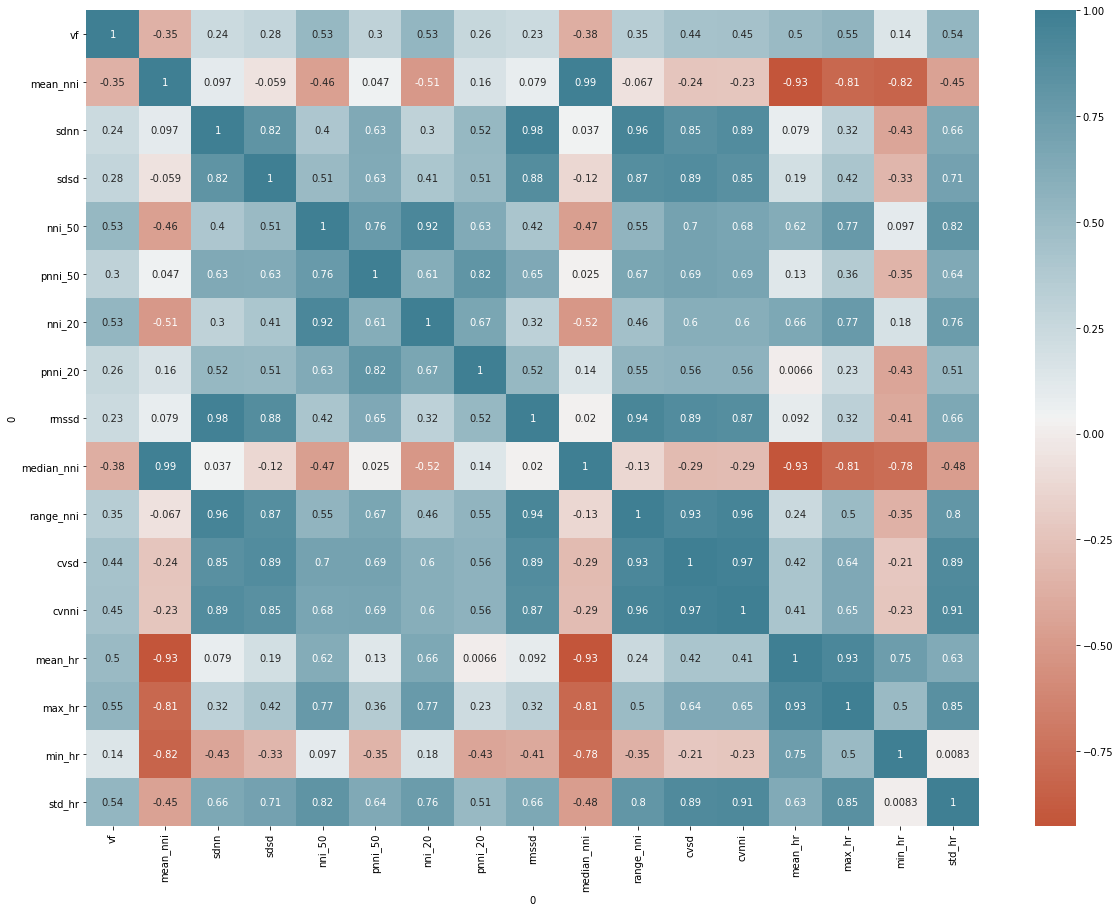

In [49]:
plot_corr(vfdb_feats,'vfdbHeatmap')

## Plot only dependent variable corr

In [7]:
vfdb_feats = pd.read_csv("FinalFeats/vfdbfeats.csv")
afdb_feats = pd.read_csv("FinalFeats/afdbfeats.csv")
challenge_feats = pd.read_csv("FinalFeats/2017feats.csv")

In [70]:
vfdb_feats.drop(columns = ['median_nni','range_nni'], inplace = True)
afdb_feats.drop(columns = ['median_nni','range_nni'], inplace = True)
challenge_feats.drop(columns = ['median_nni','range_nni'], inplace = True)

In [94]:
import pprint
def get_best_corr(df, label, top_n=0):
    s = df.select_dtypes(include='object').columns
    df[s] = df[s].astype("float")
    corrmat = df.corr()
#     print(corrmat[label])
    required = corrmat[label]
    if(top_n!=0):
        pprint.pprint(corrmat.sort_values(by=label, key=abs, ascending = False)[label][1:top_n+1].to_dict())
    else:
        print(corrmat.sort_values(by=label, key=abs, ascending = False)[label].to_dict())
#     top_corr_features = corrmat.index
#     plt.subplots(figsize=(20,15))
#     g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200))
#     plt.savefig(finalfeats_path+plotname)

## Top 4 through 14 features

In [232]:
n = 4

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'max_hr': 0.5525932362348347,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'std_hr': 0.5359121907575933}
AFDB:
{'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008}
2017:
{'cvsd': 0.5286614180371076,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_50': 0.5813343453414543}


In [233]:
n = 6

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'cvnni': 0.450890026219649,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_50': 0.5813343453414543}


In [234]:
n = 8

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'sdnn': 0.5474941358848239,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.44733408113519435,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_50': 0.5813343453414543,
 'sdsd': 0.45814532706766586}


In [235]:
n = 10

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'pnni_50': 0.3028604371898593,
 'sdsd': 0.2844186217934457,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'max_hr': 0.5428138962553284,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'sdnn': 0.5474941358848239,
 'sdsd': 0.5249338060244614,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.44733408113519435,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_20': 0.4446831098528145,
 'pnni_50': 0.5813343453414543,
 'sdsd': 0.45814532706766586,
 'std_hr': 0.4423495381445425}


In [236]:
n = 12

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'pnni_20': 0.2606519305548472,
 'pnni_50': 0.3028604371898593,
 'sdnn': 0.23792385779624717,
 'sdsd': 0.2844186217934457,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'max_hr': 0.5428138962553284,
 'mean_hr': 0.4645368876928366,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'rmssd': 0.513429115641444,
 'sdnn': 0.5474941358848239,
 'sdsd': 0.5249338060244614,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.44733408113519435,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_20': 0.4446831098528145,
 'pnni_50': 0.5813343453414

In [237]:
n = 14

print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf', n)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af', n)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af', n)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'min_hr': 0.14315701677797643,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'pnni_20': 0.2606519305548472,
 'pnni_50': 0.3028604371898593,
 'rmssd': 0.23348994050468982,
 'sdnn': 0.23792385779624717,
 'sdsd': 0.2844186217934457,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'max_hr': 0.5428138962553284,
 'mean_hr': 0.4645368876928366,
 'mean_nni': -0.42143398129121584,
 'min_hr': 0.026063761146766833,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'rmssd': 0.513429115641444,
 'sdnn': 0.5474941358848239,
 'sdsd': 0.5249338060244614,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.447334081

## Top 10

In [98]:
print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf',10)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af',10)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af',10)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'pnni_50': 0.3028604371898593,
 'sdsd': 0.2844186217934457,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'max_hr': 0.5428138962553284,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'sdnn': 0.5474941358848239,
 'sdsd': 0.5249338060244614,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.44733408113519435,
 'nni_20': 0.6114214225684205,
 'nni_50': 0.6851729543090167,
 'pnni_20': 0.4446831098528145,
 'pnni_50': 0.5813343453414543,
 'sdsd': 0.45814532706766586,
 'std_hr': 0.4423495381445425}


## Top 14

In [99]:
print("VFDB:",end="\n")
get_best_corr(vfdb_feats,'vf',14)
print("AFDB:",end="\n")
get_best_corr(afdb_feats,'af',14)
print("2017:",end="\n")
get_best_corr(challenge_feats,'af',14)

VFDB:
{'cvnni': 0.450890026219649,
 'cvsd': 0.43745334691588983,
 'max_hr': 0.5525932362348347,
 'mean_hr': 0.5018688327087617,
 'mean_nni': -0.35306595770834737,
 'min_hr': 0.14315701677797643,
 'nni_20': 0.5283437742438841,
 'nni_50': 0.526132477107798,
 'pnni_20': 0.2606519305548472,
 'pnni_50': 0.3028604371898593,
 'rmssd': 0.23348994050468982,
 'sdnn': 0.23792385779624717,
 'sdsd': 0.2844186217934457,
 'std_hr': 0.5359121907575933}
AFDB:
{'cvnni': 0.6441051616682536,
 'cvsd': 0.6075463152564952,
 'max_hr': 0.5428138962553284,
 'mean_hr': 0.4645368876928366,
 'mean_nni': -0.42143398129121584,
 'min_hr': 0.026063761146766833,
 'nni_20': 0.7458485384650697,
 'nni_50': 0.7575376492770757,
 'pnni_20': 0.6968664648667948,
 'pnni_50': 0.7411562783415008,
 'rmssd': 0.513429115641444,
 'sdnn': 0.5474941358848239,
 'sdsd': 0.5249338060244614,
 'std_hr': 0.5893393235920359}
2017:
{'cvnni': 0.4953699800471328,
 'cvsd': 0.5286614180371076,
 'max_hr': 0.4689975666537544,
 'mean_hr': 0.447334081

d1 - afdb afdb df1
d2 - 2017  df2

Top 'n' features
n = 4,6,8,10,12,14

3 graph

model running time 
total pipeline inf  

d1 - 6
d2 - 6


d1 - 6 a/r    - top 6 best Sd1  abcd ef-12-13
d2 - 6 a/r    - top 10 best   Sd2 abcd ef-9-10

a r

best 

t2 t3



12 models model size and inference




no of features vs model size
"               vs inference time


T1 - d1 - 
T2 - train d1 - Sd1 and Sd2

d1 - top 4 -  abdf
d2 - top 4 - abcd


s1 s2

s1 and s2 - abc
s1 or s2 - 


T3 - train d2 -  
T4 - d2 - 


top n festures vs model size


12 + 4 models


1. Balance dataset
2. 12 csvs store
3. Create folders and csv ----> numpy
4. 12 models

afdb_train
afdb_test
challenge_train
challenge_test

In [278]:
def get_top_feats(df, label, top_n=0):
    s = df.select_dtypes(include='object').columns
    df[s] = df[s].astype("float")
    corrmat = df.corr()
    required = corrmat[label]
    if(top_n!=0):
        return(list(corrmat.sort_values(by=label, key=abs, ascending = False)[label][1:top_n+1].to_dict().keys()))
    else:
        return(list(corrmat.sort_values(by=label, key=abs, ascending = False)[label].to_dict().keys()))

In [219]:
def get_topn_df(df, label, i):
    features = get_top_feats(df, label, i)
    features.insert(0,label)
    return(features)

In [182]:
def shuffler(df):
    return df.reindex(np.random.permutation(df.index)).reset_index(drop=True)

In [230]:
def get_all_topn(dset_name, root_df, path, traindf, testdf):
    n = [4,6,8,10,12,14]
#     n = [8]
    bonsai_path = path
    for i in n:
        path = bonsai_path
        train = traindf.copy()
        test = testdf.copy()
        label = train.columns[0]
        
        features = get_topn_df(root_df, root_df.columns[0], i)
        train = train[features] 
        test = test[features]
        
        top = pd.concat([train,test])
        

        top = shuffler(top)
        
#         train = train.to_numpy()
#         test = test.to_numpy()
        
#         print(train.shape, test.shape)
        
        path = path + dset_name + '_top' + str(i) +'.csv'
        top.to_csv(path, index=False)
        
#         os.mkdir(path)

#         np.save(path + '/train.npy', train)
#         np.save(path + '/test.npy', test)
#         os.remove(path + '/train.npy')
#         os.remove(path + '/test.npy')
    
        
        print(path+"....."+"Created")
#         print(top.isnull().sum())
#         print(train.columns)
        

In [231]:
get_all_topn('AFDB', afdb_feats, '../edgeml/examples/pytorch/Bonsai/final_features/', afdb_train, afdb_test)
get_all_topn('2017', challenge_feats, '../edgeml/examples/pytorch/Bonsai/final_features/', challenge_train, challenge_test)

../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top4.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top6.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top8.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top10.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top12.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/AFDB_top14.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top4.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top6.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top8.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top10.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top12.csv.....Created
../edgeml/examples/pytorch/Bonsai/final_features/2017_top14.csv.....Created


## Command history
3)python bonsai_example2.py -dir 2017_top4/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top4.csv -kF 5 -e 100 -d 3
1)python bonsai_example2.py -dir AFDB_top6/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top6.csv -kF 5 -e 100 -d 3
2)python bonsai_example2.py -dir 2017_top6/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top6.csv -kF 5 -e 100 -d 3

## Yet to run

1)python bonsai_example2.py -dir AFDB_top8/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top8.csv -kF 5 -e 100 -d 3
2)python bonsai_example2.py -dir 2017_top8/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top8.csv -kF 5 -e 100 -d 3

python bonsai_example2.py -dir AFDB_top4_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top4.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top4_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top4.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir AFDB_top6_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top6.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top6_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top6.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir AFDB_top8_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top8.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top8_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top8.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir AFDB_top10_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top10.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top10_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top10.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir AFDB_top12_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/AFDB_top12.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top12_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top12.csv -kF 5 -e 100 -d 1
python bonsai_example2.py -dir 2017_top14_d1/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top14.csv -kF 5 -e 100 -d 1

In [ ]:
cd  /hdd/physio/edgeml/examples/pytorch/Bonsai/

In [ ]:
!python bonsai_example2.py -dir 2017_top4/ -df /hdd/physio/edgeml/examples/pytorch/Bonsai/final_features/2017_top4.csv -kF 5 -e 100 -d 3

In [218]:
n = [4,6,8,10,12,14]
for i in n:
    print("--------------------"+str(i)+"---------------------")
    print("AFDB")
    print(get_topn_df(afdb_feats, afdb_feats.columns[0], i).columns)
    print("2017")
    print(get_topn_df(challenge_feats, challenge_feats.columns[0], i).columns)

--------------------4---------------------
AFDB
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'pnni_20'], dtype='object')
2017
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'cvsd'], dtype='object')
--------------------6---------------------
AFDB
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'pnni_20', 'cvnni', 'cvsd'], dtype='object')
2017
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'cvsd', 'cvnni', 'max_hr'], dtype='object')
--------------------8---------------------
AFDB
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'pnni_20', 'cvnni', 'cvsd',
       'std_hr', 'sdnn'],
      dtype='object')
2017
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'cvsd', 'cvnni', 'max_hr', 'sdsd',
       'mean_hr'],
      dtype='object')
--------------------10---------------------
AFDB
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'pnni_20', 'cvnni', 'cvsd',
       'std_hr', 'sdnn', 'max_hr', 'sdsd'],
      dtype='object')
2017
Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'cvsd', 'cvnni', 'max_hr', 'sdsd',
       'mean

In [280]:
def get_top_feats(df, label, top_n=0):
    s = df.select_dtypes(include='object').columns
    df[s] = df[s].astype("float")
    corrmat = df.corr()
    required = corrmat[label]
    correlations = abs(corrmat.sort_values(by=label, key=abs, ascending = False)[label].values)
    features = corrmat.sort_values(by=label, key=abs, ascending = False)[label].index[:top_n+1]
    return(correlations, features)

In [281]:
def get_topn(df, label, i):
    corr_values,features = get_top_feats(df, label, i)
#     features.insert(0,label)
    return(corr_values,features)

In [282]:
get_topn(afdb_feats, 'af', 14)

(array([1.        , 0.75753765, 0.74584854, 0.74115628, 0.69686646,
        0.64410516, 0.60754632, 0.58933932, 0.54749414, 0.5428139 ,
        0.52493381, 0.51342912, 0.46453689, 0.42143398, 0.02606376]),
 Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'pnni_20', 'cvnni', 'cvsd',
        'std_hr', 'sdnn', 'max_hr', 'sdsd', 'rmssd', 'mean_hr', 'mean_nni',
        'min_hr'],
       dtype='object'))

In [249]:
get_topn(challenge_feats, 'af', 14)

(array([1.        , 0.68517295, 0.61142142, 0.58133435, 0.52866142,
        0.49536998, 0.46899757, 0.45814533, 0.44733408, 0.44468311,
        0.44234954, 0.42711528, 0.40122958, 0.31820363, 0.08853655]),
 Index(['af', 'nni_50', 'nni_20', 'pnni_50', 'cvsd', 'cvnni', 'max_hr', 'sdsd',
        'mean_hr', 'pnni_20', 'std_hr', 'rmssd', 'sdnn', 'mean_nni', 'min_hr'],
       dtype='object'))

In [287]:
afdb_best = list(get_topn(afdb_feats, 'af', 12)[1][1:])
afdb_best

['nni_50',
 'nni_20',
 'pnni_50',
 'pnni_20',
 'cvnni',
 'cvsd',
 'std_hr',
 'sdnn',
 'max_hr',
 'sdsd',
 'rmssd',
 'mean_hr']

In [284]:
challenge_best = list(get_topn(challenge_feats, 'af', 14)[1][1:])
challenge_best

['nni_50',
 'nni_20',
 'pnni_50',
 'cvsd',
 'cvnni',
 'max_hr',
 'sdsd',
 'mean_hr',
 'pnni_20',
 'std_hr',
 'rmssd',
 'sdnn',
 'mean_nni',
 'min_hr']

In [322]:
intersection    

['af',
 'nni_50',
 'nni_20',
 'pnni_50',
 'cvsd',
 'cvnni',
 'max_hr',
 'sdsd',
 'mean_hr',
 'pnni_20',
 'std_hr',
 'rmssd',
 'sdnn']

In [288]:
intersection = [i for i in challenge_best if (i in afdb_best)]
union = challenge_best

In [311]:
intersection.insert(0,'af')
union.insert(0,'af')

In [313]:
len(union)

15

In [314]:
len(intersection)

13

T2 - Train AFDB Test 2017

UNION - Train afdb_union test 2017_union
INTER - Train afdb_inter test 2017_inter

T3 - Train 2017 Test AFDB

UNION - Train 2017_union test afdb_union
INTER - Train 2017_inter test afdb_inter

In [315]:
afdb_final = pd.concat([afdb_train,afdb_test])
afdb_final = shuffler(afdb_final)
afdb_union = afdb_final[union].copy()
afdb_inter = afdb_final[intersection].copy()

In [316]:
challenge_final = pd.concat([challenge_train,challenge_test])
challenge_final = shuffler(challenge_final)
challenge_union = challenge_final[union].copy()
challenge_inter = challenge_final[intersection].copy()

In [317]:
path_t2u = "../edgeml/examples/pytorch/Bonsai/T2_union/"

np.save(path_t2u + '/train.npy', afdb_union)
np.save(path_t2u + '/test.npy', challenge_union)

In [318]:
path_t2i = "../edgeml/examples/pytorch/Bonsai/T2_inter/"

np.save(path_t2i + '/train.npy', afdb_inter)
np.save(path_t2i + '/test.npy', challenge_inter)

In [319]:
path_t3u = "../edgeml/examples/pytorch/Bonsai/T3_union/"

np.save(path_t3u + '/train.npy', challenge_union)
np.save(path_t3u + '/test.npy', afdb_union)

In [320]:
path_t3i = "../edgeml/examples/pytorch/Bonsai/T3_inter/"

np.save(path_t3i + '/train.npy', challenge_inter)
np.save(path_t3i + '/test.npy', afdb_inter)

In [321]:
challenge_union

,af,nni_50,nni_20,pnni_50,cvsd,cvnni,max_hr,sdsd,mean_hr,pnni_20,std_hr,rmssd,sdnn,mean_nni,min_hr
0,1,5.0,5.0,100.000000,0.225140,0.168212,441.176471,39.382229,350.235404,100.000000,54.972745,39.512023,29.521179,175.500000,276.497696
1,1,7.0,8.0,77.777778,0.592026,0.348276,769.230769,72.937484,530.872923,88.888889,140.462121,72.937568,42.907653,123.200000,266.666667
2,1,1.0,2.0,33.333333,0.060426,0.039931,237.154150,14.764823,227.755862,66.666667,7.744858,15.937377,10.531698,263.750000,215.827338
3,0,0.0,0.0,0.000000,0.006139,0.004341,226.415094,1.632993,225.567098,0.000000,0.847997,1.632993,1.154701,266.000000,224.719101
4,0,0.0,2.0,0.000000,0.026067,0.021395,298.507463,5.315073,293.075411,50.000000,5.573777,5.338539,4.381780,204.800000,285.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0,1.0,5.0,16.666667,0.051791,0.048007,397.350993,8.117197,375.728557,83.333333,16.406254,8.286535,7.681146,160.000000,346.820809
37496,1,7.0,7.0,100.000000,0.307276,0.187848,483.870968,46.890232,404.372721,100.000000,64.679734,46.898066,28.670231,152.625000,291.262136
37497,1,5.0,6.0,83.333333,0.174722,0.103537,431.654676,28.087660,373.700407,100.000000,34.947059,28.304888,16.772994,162.000000,314.136126
37498,1,3.0,5.0,27.272727,0.166433,0.137534,697.674419,15.991217,633.309609,45.454545,67.855816,15.991475,13.214719,96.083333,451.127820
